Saving car data.csv to car data (2).csv
Shape: (301, 9)

Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
Column Names: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

Data Types:
 Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


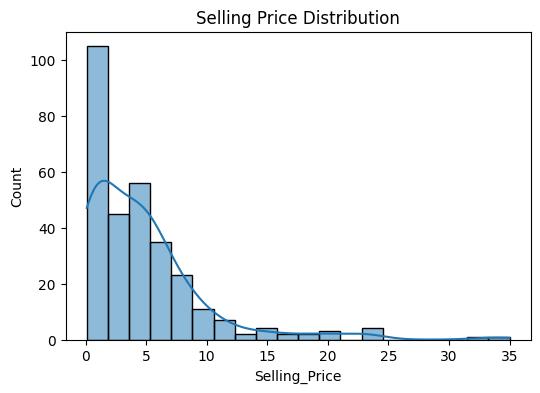

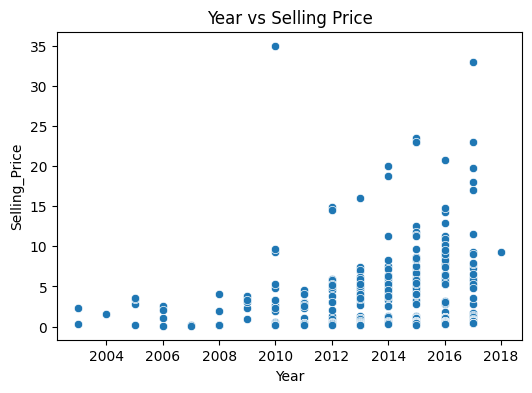

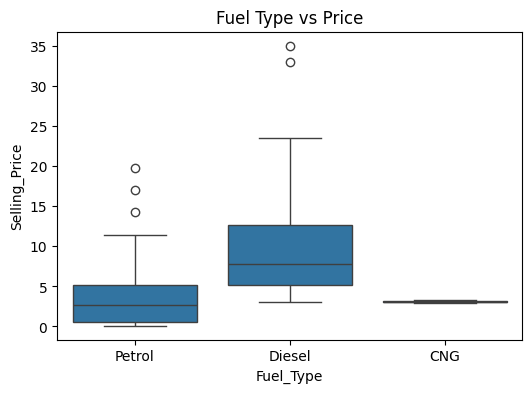

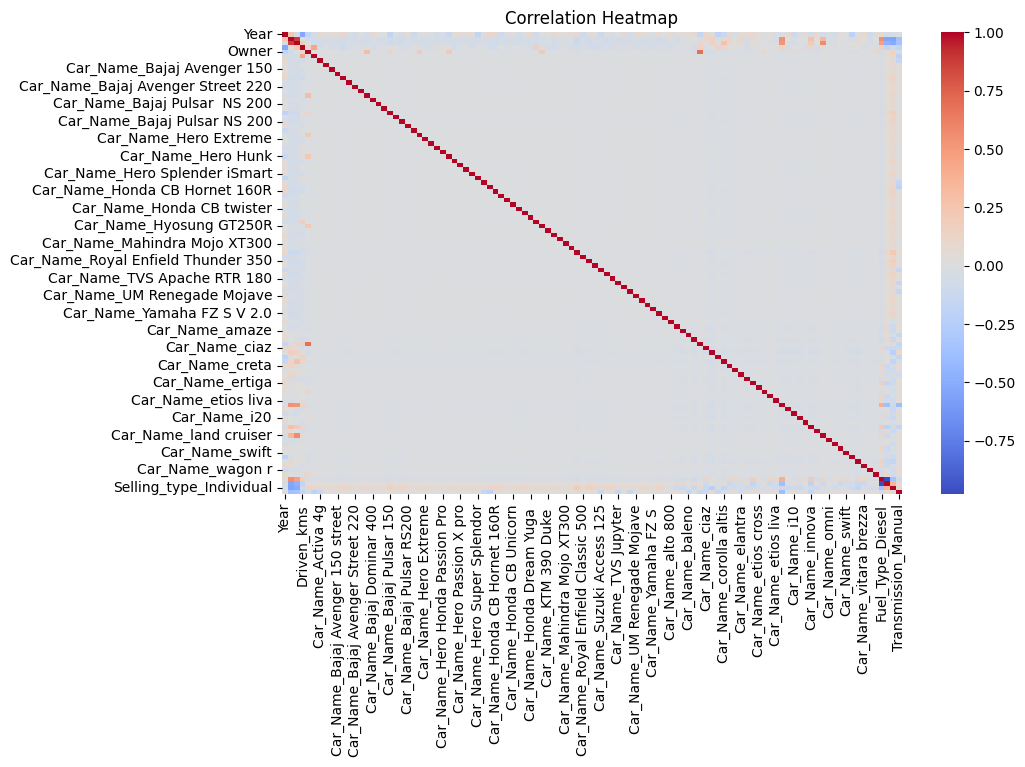

Train Shape: (240, 105) Test Shape: (61, 105)


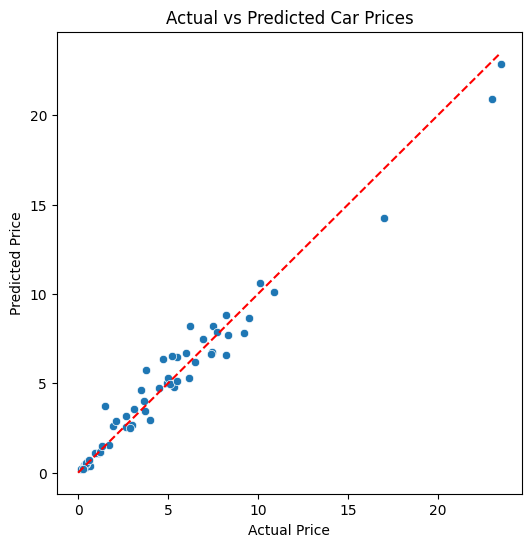

💰 Predicted Selling Price: 7.29 Lakhs


/tmp/ipython-input-3436682277.py:189: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df.head(10), palette="Blues_r")


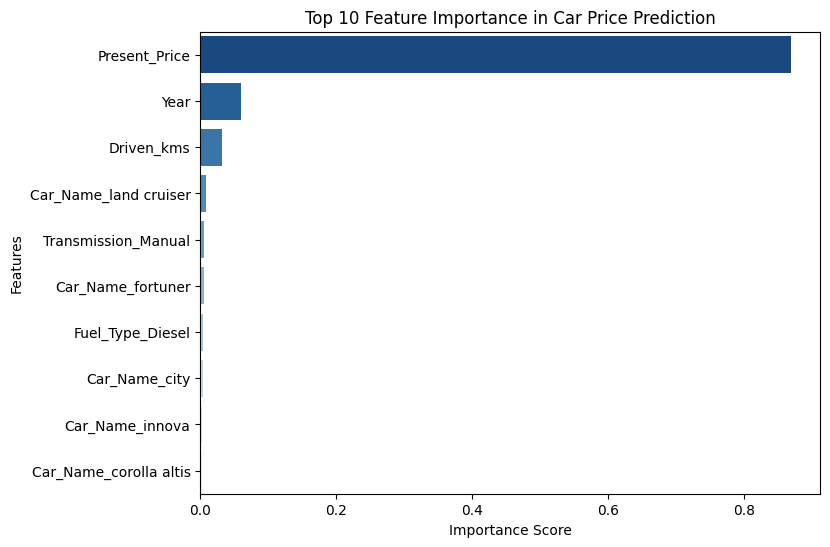

In [4]:
# 🚗 Car Price Prediction Project
# ============================================
# Step 1: Install Dependencies
# ============================================
# We start by installing the required Python libraries for data analysis, visualization, and machine learning.
!pip install matplotlib seaborn scikit-learn

# ============================================
# Step 2: Import Libraries & Upload Dataset
# ============================================
# We upload the car dataset and import essential libraries like Pandas, Matplotlib, Seaborn, and NumPy.
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

uploaded = files.upload()
df = pd.read_csv("car data.csv")

# ============================================
# Step 3: Helper Function for Pretty Tables
# ============================================
# To make outputs look professional, we define a `pretty_table` function that styles tables with colors and formatting.
def pretty_table(df, cmap="Blues"):
    return df.style.format(precision=4).background_gradient(cmap=cmap).set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#2E86C1'),
                    ('color', 'white'),
                    ('font-size', '12px')]}]
    )

# ============================================
# Step 4: Basic Info
# ============================================
# Check the shape of the dataset, missing values, and preview the first rows.
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
pretty_table(df.head())

# ============================================
# Step 5: Column Information
# ============================================
# View column names and data types to understand the dataset structure.
print("Column Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

# ============================================
# Step 6: Statistical Summary
# ============================================
# Generate descriptive statistics (mean, median, min, max, std) for numerical columns.
pretty_table(df.describe())

# ============================================
# Step 7: Data Visualization (Univariate & Bivariate)
# ============================================
# Visualize relationships between price and features like Year, Fuel Type, etc.

# Selling Price Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Selling_Price"], bins=20, kde=True)
plt.title("Selling Price Distribution")
plt.show()

# Year vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x="Year", y="Selling_Price", data=df)
plt.title("Year vs Selling Price")
plt.show()

# Fuel Type vs Price
plt.figure(figsize=(6,4))
sns.boxplot(x="Fuel_Type", y="Selling_Price", data=df)
plt.title("Fuel Type vs Price")
plt.show()

# ============================================
# Step 8: Correlation Heatmap
# ============================================
# Plot correlation heatmap and identify which features impact Selling Price the most.
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

pretty_table(df_encoded.corr()["Selling_Price"].sort_values(ascending=False).to_frame(), cmap="Reds")

# ============================================
# Step 9: Feature Engineering
# ============================================
# Convert categorical variables into numerical values using one-hot encoding.
X = pd.get_dummies(df.drop("Selling_Price", axis=1), drop_first=True)
y = df["Selling_Price"]

pretty_table(pd.DataFrame({"Feature Columns": X.columns}))

# ============================================
# Step 10: Train-Test Split
# ============================================
# Split the dataset into training and testing sets for model building and evaluation.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train Shape:", X_train.shape, "Test Shape:", X_test.shape)

# ============================================
# Step 11: Train Random Forest Model
# ============================================
# We use Random Forest Regressor as the machine learning model to predict car prices.
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ============================================
# Step 12: Model Evaluation
# ============================================
# Evaluate the model using R² Score, MAE, and RMSE metrics.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

results = pd.DataFrame({
    "Metric": ["R2 Score", "MAE", "RMSE"],
    "Value": [r2_score(y_test, y_pred),
              mean_absolute_error(y_test, y_pred),
              np.sqrt(mean_squared_error(y_test, y_pred))]
})

pretty_table(results, cmap="Greens")

# ============================================
# Step 13: Compare Predictions with Actual
# ============================================
# Compare actual vs predicted prices and visualize them with a scatter plot.
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
pretty_table(comparison.head(10), cmap="Purples")

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

# ============================================
# Step 14: Prediction on New Car Data
# ============================================
# Test the trained model on a new car example to predict its selling price.
new_car = pd.DataFrame({
    "Year": [2019],
    "Present_Price": [8.5],
    "Kms_Driven": [30000],
    "Fuel_Type": ["Petrol"],
    "Seller_Type": ["Dealer"],
    "Transmission": ["Manual"],
    "Owner": [0]
})

new_car_encoded = pd.get_dummies(new_car, drop_first=True)
new_car_encoded = new_car_encoded.reindex(columns=X.columns, fill_value=0)

predicted_price = model.predict(new_car_encoded)[0]
print(f"💰 Predicted Selling Price: {predicted_price:.2f} Lakhs")

pretty_table(new_car)

# ============================================
# Step 15: Feature Importance
# ============================================
# Identify the most important features affecting car price predictions.
importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

pretty_table(importance_df.head(10))

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(10), palette="Blues_r")
plt.title("Top 10 Feature Importance in Car Price Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()